In [ ]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Data Characteristics:
       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino 

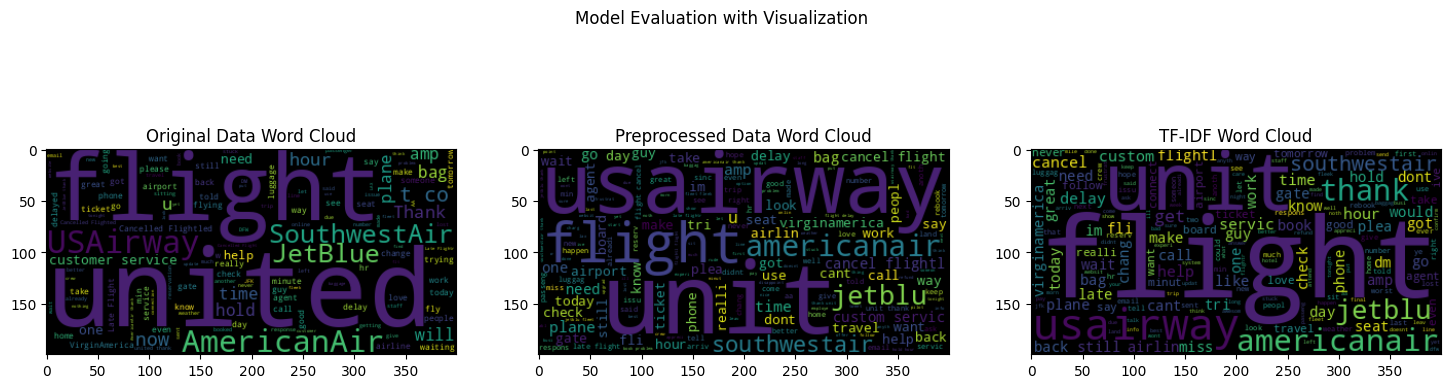


Naive Bayes Model Evaluation:
Accuracy: 0.6919398907103825

Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      1889
     neutral       0.77      0.14      0.24       580
    positive       0.88      0.15      0.26       459

    accuracy                           0.69      2928
   macro avg       0.78      0.43      0.44      2928
weighted avg       0.73      0.69      0.61      2928


Confusion Matrix:
[[1875   13    1]
 [ 490   82    8]
 [ 378   12   69]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Model Evaluation:
Accuracy: 0.792691256830601

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.94      0.87      1889
     neutral       0.66      0.46      0.55       580
    positive       0.80      0.60      0.68       459

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.79      0.78      2928


Confusion Matrix:
[[1778   80   31]
 [ 273  269   38]
 [ 128   57  274]]


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


df = pd.read_csv('/content/Tweets.csv')


print("Original Data Characteristics:")
print(df.head())


print("\nExploratory Data Analysis:")
print(df.info())
print(df.describe())


def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['processed_text'] = df['text'].apply(preprocess_text)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


print("\nTF-IDF Matrix:")
print(tfidf_df.head())


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Evaluation with Visualization')


wordcloud_original = WordCloud(width=400, height=200, random_state=42).generate(' '.join(df['text']))
axes[0].imshow(wordcloud_original, interpolation='bilinear')
axes[0].set_title('Original Data Word Cloud')


wordcloud_preprocessed = WordCloud(width=400, height=200, random_state=42).generate(' '.join(df['processed_text']))
axes[1].imshow(wordcloud_preprocessed, interpolation='bilinear')
axes[1].set_title('Preprocessed Data Word Cloud')


wordcloud_tfidf = WordCloud(width=400, height=200, random_state=42).generate_from_frequencies(tfidf_df.sum(axis=0))
axes[2].imshow(wordcloud_tfidf, interpolation='bilinear')
axes[2].set_title('TF-IDF Word Cloud')

plt.show()


X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['airline_sentiment'], test_size=0.2, random_state=42)

## naive bayesian
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)


y_pred_nb = naive_bayes_classifier.predict(X_test)


print("\nNaive Bayes Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

##logistic regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


y_pred_lr = logistic_regression.predict(X_test)


print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))